Part 1: Dataset loading and inspection

In [32]:
import pandas as pd

file_path = r'C:\Users\Χριστόδουλος\Downloads\synthetic_covid19_dataset.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.info())

   Age  Neutrophil Count (NEUT)  Oxygen Saturation (O2sat)  Albumin (ALBUMIN)  \
0  71          16.744405                 81.971214              4.171386        
1  34          15.885922                 99.397433              4.009169        
2  80           6.264316                 76.776442              4.396247        
3  40          18.876723                 88.364760              2.771344        
4  43           3.362571                 82.989192              3.854128        

     Urea     Blood Urea Nitrogen (BUN)  C-Reactive Protein (CR)  \
0  29.523339          13.312831                 28.873645          
1  25.257532           6.439639                 42.610439          
2  43.255051          13.456069                 19.487371          
3  29.608058          20.812547                 25.817708          
4  19.854856          21.097710                  0.546420          

   Lactate Dehydrogenase (LDH)   Ferritin   Phosphate (P)  \
0          222.263216           270.054340 

In [33]:
print(data.describe())

           Age      Neutrophil Count (NEUT)  Oxygen Saturation (O2sat)  \
count  4778.000000        4778.000000               4778.000000          
mean     54.472373          10.326521                 84.990013          
std      20.132390           5.446976                  8.676524          
min      20.000000           1.004314                 70.001585          
25%      37.000000           5.630488                 77.463461          
50%      54.000000          10.199778                 84.822529          
75%      72.000000          14.992072                 92.625885          
max      89.000000          19.989753                 99.990196          

       Albumin (ALBUMIN)     Urea      Blood Urea Nitrogen (BUN)  \
count     4778.000000     4778.000000         4778.000000          
mean         3.518837       30.482314           14.921092          
std          0.861967       11.616743            5.723407          
min          2.000757       10.001925            5.002205    

In [34]:
print(data.isnull().sum())

Age                            0
Neutrophil Count (NEUT)        0
Oxygen Saturation (O2sat)      0
Albumin (ALBUMIN)              0
Urea                           0
Blood Urea Nitrogen (BUN)      0
C-Reactive Protein (CR)        0
Lactate Dehydrogenase (LDH)    0
Ferritin                       0
Phosphate (P)                  0
Decreased Consciousness        0
Dialysis                       0
ProBNP                         0
INR                            0
BE                             0
dtype: int64


Part 2: Profiling the Dataset with `AutoViz`, `SweetViz`, and `pandas_profiling`
A. Using `AutoViz` for Automatic EDA**

In [36]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_autoviz = AV.AutoViz(filename=file_path)

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
Shape of your Data Set loaded: (4778, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Numbe

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.000000,1,20.000000,89.000000,No issue
Neutrophil Count (NEUT),float64,0.000000,NA,1.004314,19.989753,No issue
Oxygen Saturation (O2sat),float64,0.000000,NA,70.001585,99.990196,No issue
Albumin (ALBUMIN),float64,0.000000,NA,2.000757,4.999774,No issue
Urea,float64,0.000000,NA,10.001925,49.996039,No issue
Blood Urea Nitrogen (BUN),float64,0.000000,NA,5.002205,24.993912,No issue
C-Reactive Protein (CR),float64,0.000000,NA,0.003375,49.986604,No issue
Lactate Dehydrogenase (LDH),float64,0.000000,NA,100.002768,599.894686,No issue
Ferritin,float64,0.000000,NA,50.862399,1499.841319,No issue
Phosphate (P),float64,0.000000,NA,2.500050,5.499916,No issue


Number of All Scatter Plots = 78
All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [37]:
!pip install sweetviz
import sweetviz as sv

report = sv.analyze(data)

report.show_html('sweetviz_report.html')

Defaulting to user installation because normal site-packages is not writeable


                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


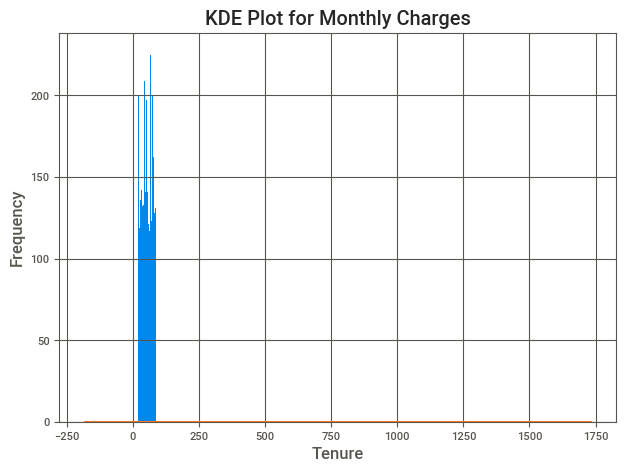

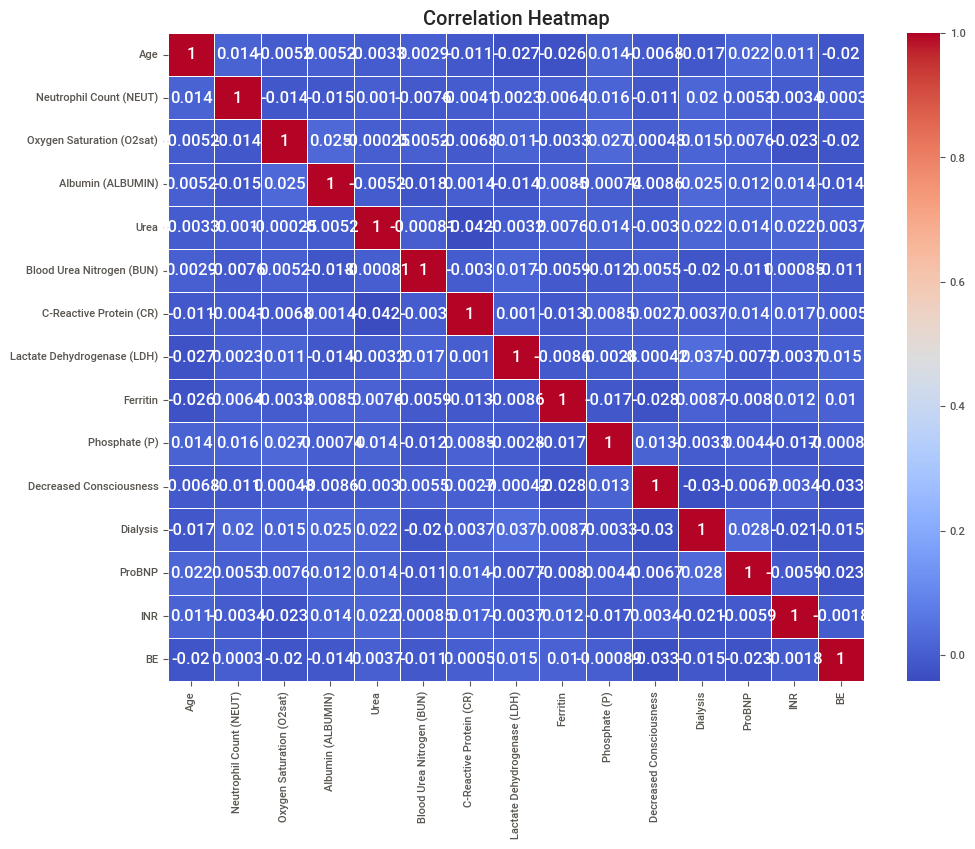

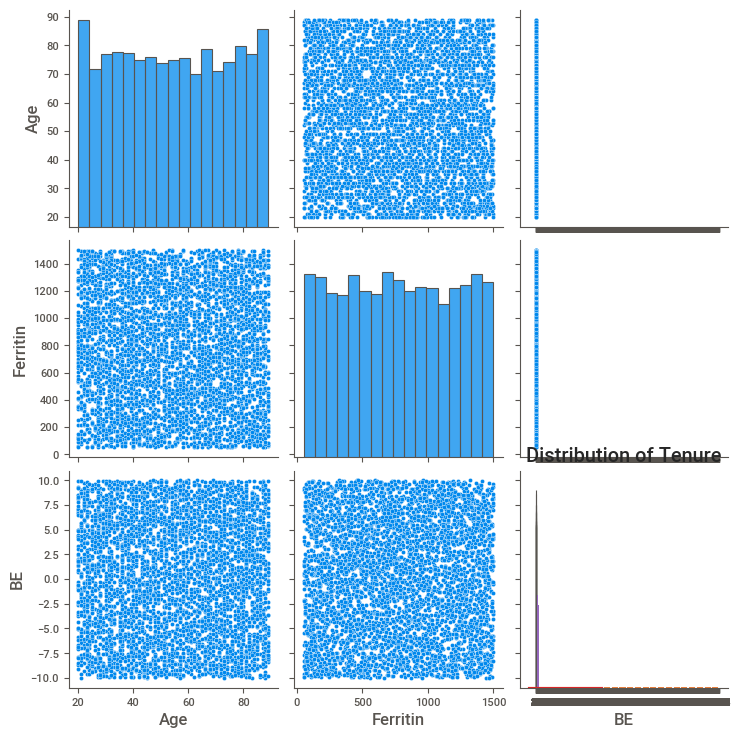

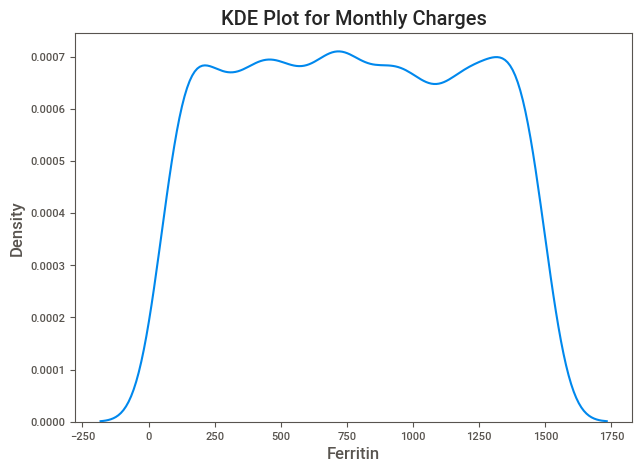

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data['Age'].hist(bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Age')
plt.ylabel('Ferritin')
plt.show()

sns.kdeplot(data['Ferritin'])
plt.title('KDE Plot for Monthly Charges')
plt.show()

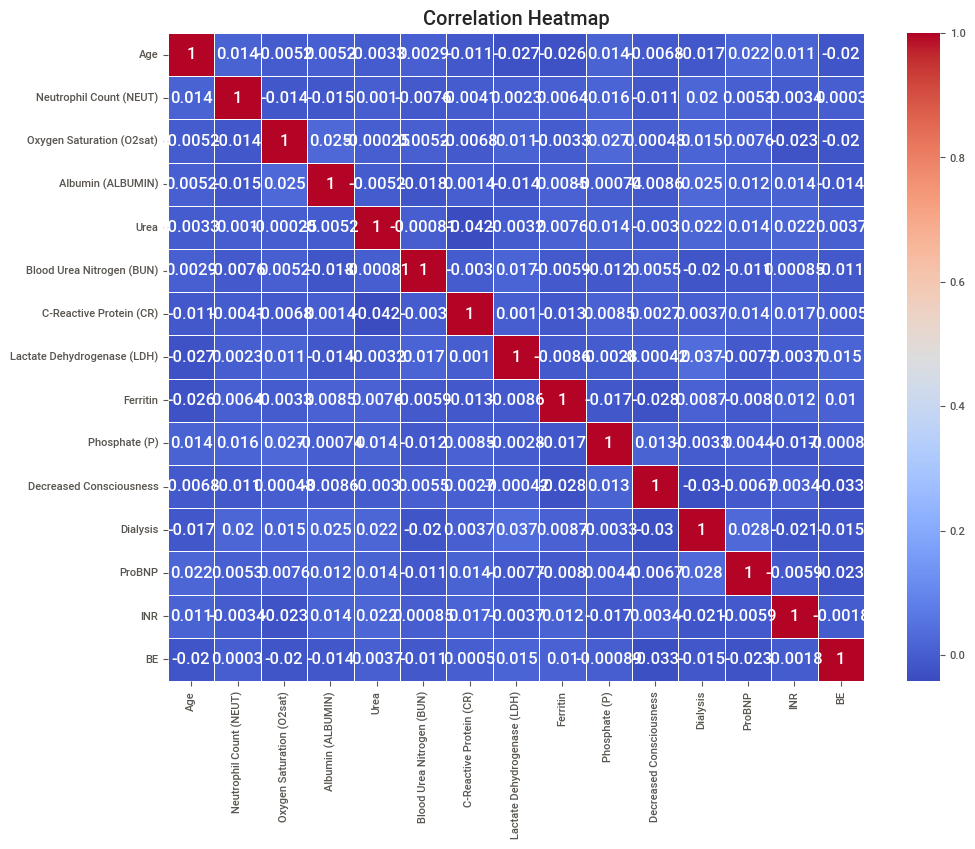

In [56]:
%matplotlib inline

plt.figure(figsize=(10,8))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

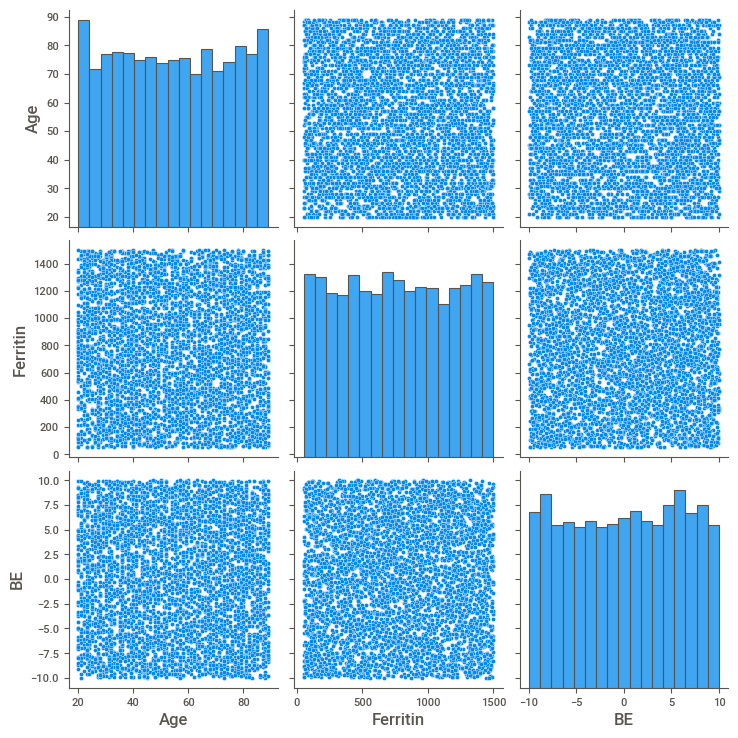

In [62]:
%matplotlib inline
sns.pairplot(data[['Age', 'Ferritin', 'BE']])
plt.show()

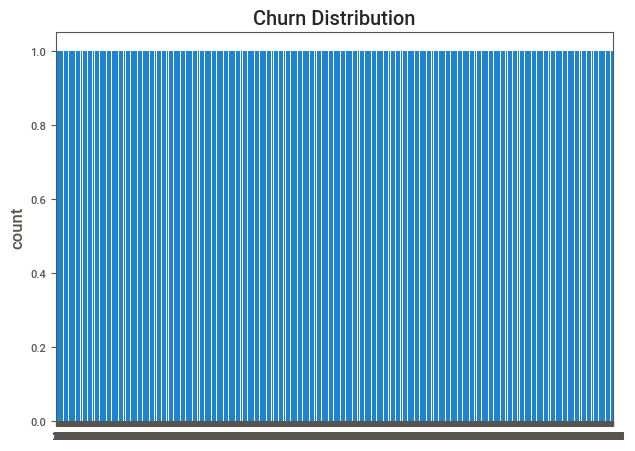

In [61]:
%matplotlib inline
sns.countplot(data['Age'])
plt.title('Churn Distribution')
plt.show()